In [76]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LinearSegmentedColormap
from textwrap import wrap
from lmfit.models import PolynomialModel, GaussianModel, PseudoVoigtModel, ExponentialModel, Model
import scipy as scipy

%run TimeResolvedFunctions.ipynb
%run SteadyStateFunctions.ipynb
%run GeneralFunctions.ipynb


In [39]:
###RUNNING EXAMPLE###

In [40]:
##Enter raw time-resolved data##
allRawSpectraDict, allRawData = getTimeResolvedRawData()
print('TimeResolved data collected')
#Note that Time Resolved data can be accessed from this dictionary using allRawSpectraDict['ConditionName']['ReplicateName']

How many conditions are you working with?: 1
What is the condition #1?: test
How many time-resolved spectra are you entering for this condition?: 1
Enter name of replicate 1: a
Enter location of replicate 1: TimeResolved/TR_Example
TimeResolved data collected


In [82]:
##Enter steady state data##
steadyState = getAllSteadyStateData()
print('SteadyState data collected')

How many conditions are you working with?: 1
What is the condition #1?: test
Enter location of beginning spectrum: SteadyState/SS_early.txt
Enter location of ending spectrum: SteadyState/SS_late.txt
SteadyState data collected


In [42]:
##Get dictionaries of amp, center, sigma at each condition##
params = {}
for key in steadyState.keys():
    params[key] = getUniversalVariables(key, steadyState)

In [69]:
#This will be adapted to be user inputted
TRP = getTRPVariables(allRawData)

Beginning indicates the scan number at which the “background” preinjection section stops. Background 2 indicates which scan number will be the first data point included in analysis.
Enter beginning: 21
Enter beginning 2: 21
Please give bounds for the region of interest
Enter lower wavenumber bound: 2180
Enter upper wavenumber bound: 2270
The average number determines the number of spectra included in a rolling average to improve signal to noise in the data.
Enter average number: 10
The poly number determines the order of the polynomial subtracted from the data to correct the baseline.
Enter poly number: 4


In [44]:
##Prepare data for plotting##
preppedSpectra, tAndWL, TRP = prepareAllTimeResolvedRawData(allRawData, allRawSpectraDict, params, TRP)

In [45]:
#create pdf to save plots to
pdfName = input('What do you want to name the pdf where plots will be saved?: ')
pdf = PdfPages(pdfName+'.pdf')

What do you want to name the pdf where plots will be saved?: test



Do you want to plot the shifting peak averaged over all replicates for every condition or for specific conditions? (every/specific/none): every


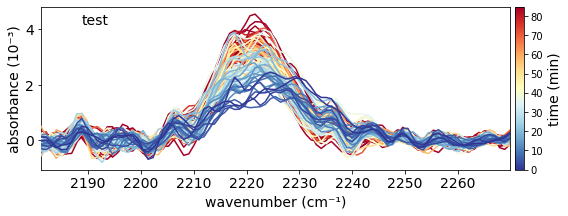

In [48]:
##Plot 1##
numPlots = approveChoice("\nDo you want to plot the shifting peak averaged over all replicates for every condition or for specific conditions? (every/specific/none): ", ["every", "specific", "none"])

if numPlots == "every":
    plotPeaksOverTime(preppedSpectra, tAndWL, pdf)

elif numPlots == 'specific':
    done = False
    while done == False:
        print("As a reminder, here are the identifiers you entered for each condition: " + all_keys)
        identifier = approveChoice('What condition do you want to plot?: ', all_keys)

        title = input('What would you like to title the plot for condition ' + identifier + '? Type the word default, none, or input your own title. (default title = Peak Shifting over Time): ')
        if title == 'default':
            title = 'Peak Shifting over Time'
        if title == 'none':
            title = ''

        title2 = input('What would you like as a subtitle the plot for condition ' + identifier + '? Type the word default, none, or input your own title. (default subtitle = '+ identifier+ '): ')
        if title2 == 'default':
            title2 = identifier
        if title2 == 'none':
            title2 = ''

        plotPeakShiftAverage(preppedSpectra, tAndWL, identifier, title, title2, pdf)
        keepPlotting = approveChoice('\nDo you want to make another plot of this type? (yes/no): ', ["yes", "no"])
        if keepPlotting == 'yes':
            done = False
        if keepPlotting == 'no':
            done = True


Do you want to overlay the unaveraged initial and final spectra for every condition or for specific conditions? (every/specific/none): every
Would you like to use the default title? (default title = Peak Position over Time from Method for Condition): yes


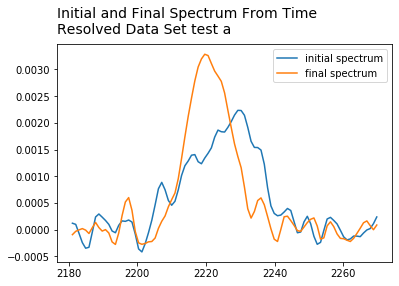

In [50]:
#PLOT 2

numUnaveragedPlots = approveChoice('\nDo you want to overlay the unaveraged initial and final spectra for every condition or for specific conditions? (every/specific/none): ', ["every", "specific", "none"])

if numUnaveragedPlots == "every":
    titleDefault = approveChoice('Would you like to use the default title? (default title = Peak Position over Time from Method for Condition): ', ["yes", "no"])

    for identifier in preppedSpectra.keys():
        if titleDefault == "yes":
            title = 'default'
        else:
            title = input('What would you like to title the plot for condition ' + identifier + '? Type the word default, none, or input your own title. (default title = Initial and Final Spectrum From Time Resolved Data Set): ')
        plotUnaveragedInitFin(preppedSpectra, tAndWL, identifier, title, pdf)

elif numUnaveragedPlots == "specific":
    done = False
    while done == False:
        print('As a reminder, here are the identifiers you entered for each condition: ' + all_keys)
        identifier = approveChoice('What condition do you want to plot?: ', all_keys)
        title = input('What would you like to title the plot for condition ' + identifier + '? Type the word default, none, or input your own title. (default title = Initial and Final Spectrum From Time Resolved Data Set): ')
        plotUnaveragedInitFin(preppedSpectra, tAndWL, identifier, title, pdf)

        keepPlotting = approveChoice('\nDo you want to make another plot of this type? (yes/no): ', ["yes", "no"])
        if keepPlotting == 'yes':
            done = False
        if keepPlotting == 'no':
            done = True



The next set of plots will plot the peak position over time from data averaged over all replicates. Would you like to plot every condition or specific conditions? (every/specific/none): every
Which method would you like to use? (HalfIntegral/SingleGaussian): HalfIntegral
Would you like to use the default title? (default title = Peak Position over Time from Method for Condition): yes

Calculating peak positions...



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


[[Model]]
    Model(test_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 1026
    # variables        = 3
    chi-square         = 300.130210
    reduced chi-square = 0.29338241
    Akaike info crit   = -1255.16598
    Bayesian info crit = -1240.36571
[[Variables]]
    A1:   2220.67165 +/- 0.02317940 (0.00%) (init = 2221)
    A2:   4.14143483 +/- 0.11208435 (2.71%) (init = 7.5)
    tau:  593.592513 +/- 25.5538928 (4.30%) (init = 600)
[[Correlations]] (unreported correlations are < 0.250)
    C(A2, tau) = -0.652
    C(A1, tau) = -0.552
Mean Time Constant: 9.89 ±0.0 minutes


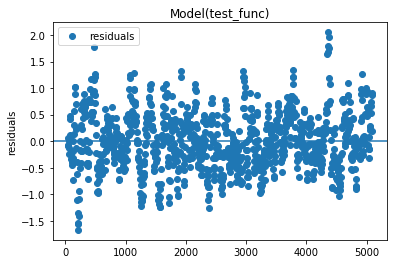

<Figure size 432x288 with 0 Axes>

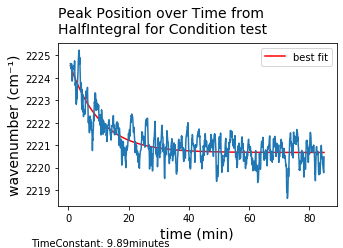

In [51]:
#PLOT 3

numCombinedTimePlots = approveChoice('\nThe next set of plots will plot the peak position over time from data averaged over all replicates. Would you like to plot every condition or specific conditions? (every/specific/none): ', ["every", "specific", "none"])

if numCombinedTimePlots == 'every':
    method = approveChoice('Which method would you like to use? (HalfIntegral/SingleGaussian): ', ["HalfIntegral", "SingleGaussian"])
    nameDefault = approveChoice('Would you like to use the default title? (default title = Peak Position over Time from Method for Condition): ', ["yes", "no"])

    for identifier in preppedSpectra.keys():
        if nameDefault == "yes":
            name = 'Peak Position over Time from '+method+' for Condition '+identifier
        else:
            name = input('What would you like to title the plot for condition ' + identifier + '? Type the word default, none, or input your own title. (default title = Peak Position over Time from '+method+' for Condition '+identifier+'): ')
            if name == 'default':
                 name = 'Peak Position over Time from '+method+' for Condition '+identifier
            if name == 'none':
                name = ''
        print("\nCalculating peak positions...\n")
        combined_time_plots(preppedSpectra, tAndWL, params, TRP, identifier, name, method, pdf)

elif numCombinedTimePlots == 'specific':
    done = False
    while done == False:
        print('As a reminder, here are the identifiers you entered for each condition: ' + all_keys)
        identifier = approveChoice('What condition do you want to plot?: ', all_keys)
        method = approveChoice('Which method would you like to use? (HalfIntegral/SingleGaussian): ', ["HalfIntegral", "SingleGaussian"])

        name = input('What would you like to title the plot for condition ' + identifier + '? Type the word default, none, or input your own title. (default title = Peak Position over Time from '+method+' for Condition '+identifier+'): ')
        if name == 'default':
             name = 'Peak Position over Time from '+method+' for Condition '+identifier
        if name == 'none':
            name = ''

        print("/nCalculating peak positions.../n")
        combined_time_plots(preppedSpectra, tAndWL, params, TRP, identifier, name, method, pdf)

        keepPlotting = approveChoice('\nDo you want to make another plot of this type? (yes/no): ', ["yes", "no"])
        if keepPlotting == 'yes':
            done = False
        if keepPlotting == 'no':
            done = True



Would you like to plot the Steady State data? This step produces a plot of the mean IR band for each condition. (yes/no)yes
What would you like to title this plot? Type the word default, none, or input your own title. (default title = Mean IR Band for Each Condition)default


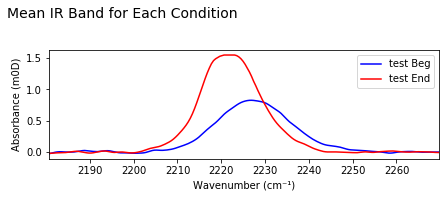

In [72]:
#PLOT 4

SteadyStatePlotting = approveChoice('\nWould you like to plot the Steady State data? This step produces a plot of the mean IR band for each condition. (yes/no)', ["yes", "no"])
wl_start = TRP['left_bound']
wl_end = TRP['right_bound']
if SteadyStatePlotting == 'yes':
    name = input('What would you like to title this plot? Type the word default, none, or input your own title. (default title = Mean IR Band for Each Condition)')
    if name == 'default':
        plotSteadyState(steadyState, wl_start, wl_end, pdf)
    else:
        if name == 'none':
            name = ''
        plotSteadyState(steadyState, wl_start, wl_end, pdf, name)

In [79]:
##Enter steady state data##
print()
print("\n" + "Now collecting steady state data...")

steadyState2 = getAllSteadyStateData_forSSonly()

##Get dictionaries of amp, center, sigma at each condition##
params2 = {}

for key in steadyState2.keys():
    params2[key] = getUniversalVariables(key, steadyState)

all_keys = ""
for i in range(len(steadyState2.keys())):
    if i < len(steadyState2.keys()) - 1:
        all_keys = all_keys + str(list(steadyState2.keys())[i])+ ", " 
    else:
        all_keys = all_keys + str(list(steadyState2.keys())[i])




Now collecting steady state data...
How many plots would you like to include? (up to 10): 2
What is the condition for plot #1?: test
How many spectra would you like to overlay for plot #1?: 2
Enter name of spectrum 1: early
Enter location of spectrum test early: SteadyState/SS_early.txt
Enter name of spectrum 2: late
Enter location of spectrum test late: SteadyState/SS_late.txt
What is the condition for plot #2?: test
How many spectra would you like to overlay for plot #2?: 2
Enter name of spectrum 1: early
Enter location of spectrum test early: SteadyState/SS_early.txt
Enter name of spectrum 2: late
Enter location of spectrum test late: SteadyState/SS_late.txt


In [80]:
#create pdf to save plots to
pdfName2 = input('What do you want to name the pdf where plots will be saved?: ')
pdf2 = PdfPages(pdfName+'.pdf')



What do you want to name the pdf where plots will be saved?: test2


Please input the lower bound for your steady-state plot x-axis 2180
Please input the upper bound for your steady-state plot x-axis 2270
What would you like to title this plot? Type the word default, none, or input your own title. (default title = Mean IR Band for Each Condition) default


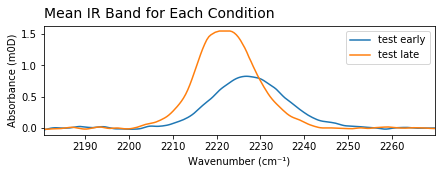

In [81]:
##Plot##

wl_start = float(input("Please input the lower bound for your steady-state plot x-axis "))
wl_end = float(input("Please input the upper bound for your steady-state plot x-axis "))

name = input('What would you like to title this plot? Type the word default, none, or input your own title. (default title = Mean IR Band for Each Condition) ')
if name == 'default':
    plotSteadyStateOnly(steadyState2, wl_start, wl_end, pdf2)
else:
    if name == 'none':
        name = ''
    plotSteadyStateOnly(steadyState2, wl_start, wl_end, pdf2, name)